In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import plotly.express as px

In [3]:
# Load the dataset
data = pd.read_csv("/content/diabetes (1).csv")

In [4]:
# Display basic info
display(data.head())
display(data.info())

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


None

<ipython-input-5-a5c999f8d268>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Outcome', y='Glucose', data=data, palette=["blue", "red"])


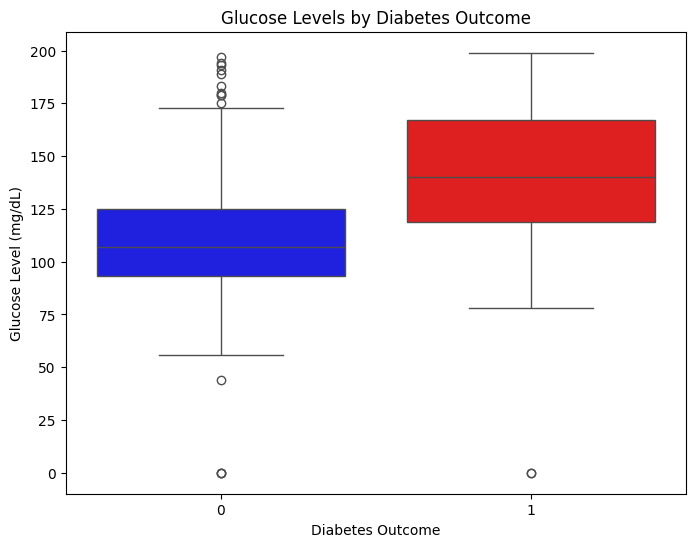

In [5]:
# Ensure 'Outcome' is treated as a categorical variable
data['Outcome'] = data['Outcome'].astype('category')

# Boxplot of Glucose levels by Outcome
plt.figure(figsize=(8, 6))
sns.boxplot(x='Outcome', y='Glucose', data=data, palette=["blue", "red"])
plt.title("Glucose Levels by Diabetes Outcome")
plt.xlabel("Diabetes Outcome")
plt.ylabel("Glucose Level (mg/dL)")
plt.show()

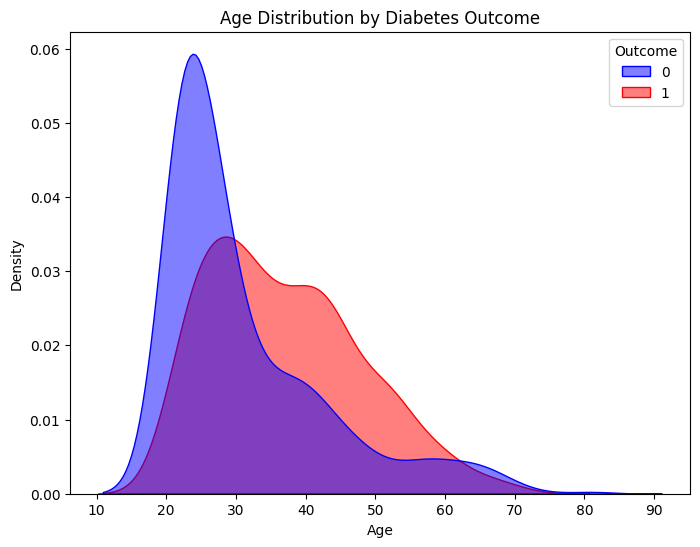

In [6]:
# Density plot of Age by Outcome
plt.figure(figsize=(8, 6))
sns.kdeplot(data=data, x='Age', hue='Outcome', fill=True, common_norm=False, palette=["blue", "red"], alpha=0.5)
plt.title("Age Distribution by Diabetes Outcome")
plt.xlabel("Age")
plt.ylabel("Density")
plt.show()


                    Feature  Importance
1                   Glucose    0.257226
5                       BMI    0.168345
7                       Age    0.132573
6  DiabetesPedigreeFunction    0.126038
2             BloodPressure    0.092014
0               Pregnancies    0.084424
4                   Insulin    0.072200
3             SkinThickness    0.067179


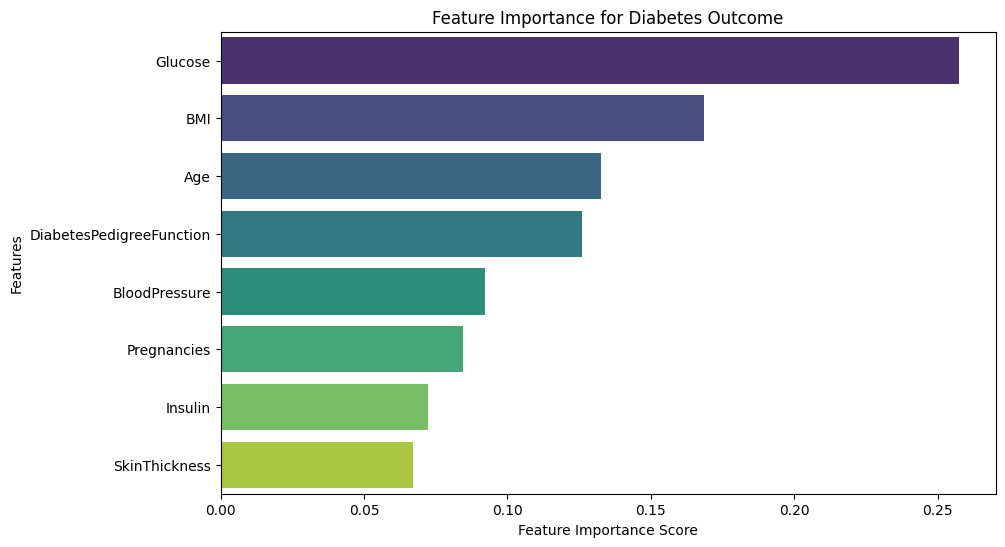

In [7]:
X = data.drop(["Outcome"], axis=1)
y = data["Outcome"]

model = RandomForestClassifier()
model.fit(X, y)

feature_importance = pd.DataFrame({'Feature': X.columns, 'Importance': model.feature_importances_})
feature_importance = feature_importance.sort_values(by='Importance', ascending=False)
print(feature_importance)
# Plot feature importance
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance, hue='Feature', palette='viridis', legend=False)
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title('Feature Importance for Diabetes Outcome')
plt.show()

In [10]:
# Interactive plots
# Select only the most important features + target variable
selected_features = ['Glucose', 'BMI', 'Age', 'DiabetesPedigreeFunction', 'BloodPressure', 'Outcome']  # Assuming 'Outcome' is the diabetes column
df_selected = data[selected_features]

# Convert 'Outcome' to categorical for better visualization
df_selected['Outcome'] = df_selected['Outcome'].map({0: 'No Diabetes', 1: 'Diabetes'})

### 1. Interactive Histogram for Glucose Levels ###
fig1 = px.histogram(df_selected, x='Glucose', color='Outcome', barmode='overlay',
                    title="Distribution of Glucose Levels by Diabetes Status",
                    labels={'Glucose': 'Glucose Level', 'Outcome': 'Diabetes Status'})
fig1.show()

### 2. Interactive Scatter Plot (Age vs. BMI) ###
fig2 = px.scatter(df_selected, x='Age', y='BMI', color='Outcome',
                  title="Age vs. BMI Colored by Diabetes Status",
                  labels={'Age': 'Age (years)', 'BMI': 'Body Mass Index'},
                  hover_data=['DiabetesPedigreeFunction'])
fig2.show()

### 3. Interactive Box Plot for Blood Pressure ###
fig3 = px.box(df_selected, x='Outcome', y='BloodPressure', color='Outcome',
              title="Blood Pressure Levels by Diabetes Status",
              labels={'BloodPressure': 'Blood Pressure', 'Outcome': 'Diabetes Status'})
fig3.show()

### 4. Interactive Violin Plot for Diabetes Pedigree Function ###
fig4 = px.violin(df_selected, x='Outcome', y='DiabetesPedigreeFunction', color='Outcome',
                 title="Diabetes Pedigree Function by Diabetes Status",
                 box=True, points="all",
                 labels={'DiabetesPedigreeFunction': 'Diabetes Pedigree Function', 'Outcome': 'Diabetes Status'})
fig4.show()

<ipython-input-10-96592611a740>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_selected['Outcome'] = df_selected['Outcome'].map({0: 'No Diabetes', 1: 'Diabetes'})


In [12]:
# Select only the 3 important features and the target variable (Outcome)
selected_features = ['Glucose', 'BMI', 'Age']
X = data[selected_features]  # Features
y = data['Outcome']  # Target variable (assuming 'Outcome' is the target)

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Random Forest Classifier
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.4f}')
print('\nClassification Report:\n', classification_report(y_test, y_pred))



Accuracy: 0.7338

Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.77      0.79        99
           1       0.62      0.67      0.64        55

    accuracy                           0.73       154
   macro avg       0.71      0.72      0.72       154
weighted avg       0.74      0.73      0.74       154



In [13]:
# Predict diabetes risk for a person with the given values
# Input values: Age = 54, Height = 178 cm, Weight = 96 kg, Glucose = 125 mg/dL
age = 54
height_cm = 178
weight_kg = 96
glucose = 125

# Calculate BMI
bmi = weight_kg / ((height_cm / 100) ** 2)  # Convert height to meters and calculate BMI

# Prepare input data for prediction
input_data = pd.DataFrame([[glucose, bmi, age]], columns=['Glucose', 'BMI', 'Age'])

# Make prediction for the new data
predicted_class = model.predict(input_data)[0]  # 0 = No Diabetes, 1 = Diabetes
predicted_prob = model.predict_proba(input_data)[0][1]  # Probability of diabetes

# Print results for the new input
print(f"Predicted Diabetes Status: {'High Risk of Diabetes' if predicted_class == 1 else 'Low risk of  Diabetes'}")
print(f"Diabetes Probability: {predicted_prob:.2%}")

Predicted Diabetes Status: High Risk of Diabetes
Diabetes Probability: 87.00%
